# Notes to Group:

# Someone go under cogs108 github and format the notebook according to the correct specifications please

# **Weed the People (Group 068)** Final Project


**Group Members:**

1. Joseph Hwang
2. Victor Alonso
3. Jose Figueroa
4. George Javier
5. Elroy He

**Member PID's:**

1. Joseph Hwang - A13148150
2. Victor Alonso -
3. Jose Figueroa
4. George Javier
5. Elroy He

## Data Sets

- WeedMaps.com
- San Diego County Median Incomes (obtained from sandag.org (2010 data), can use more recent data from data.sandiegocounty.gov (2016 data)) https://data.sandiegocounty.gov/Demographics/2016-San-Diego-County-Demographics-Number-of-House/cr22-d523
- San Diego County Population Density (obtained from data.sandiegocounty.gov) https://data.sandiegocounty.gov/Demographics/2016-San-Diego-County-Demographics-Population-by-G/3mpb-24xg



## Shape File Data

Obtained from SanGIS.org

- Municipal_Boundaries (under 'jurisdiction' datasets)
- Major_Roads, Roads_All (under 'transportation' datasets)

## Imports

In [135]:
# Imports for ...

import numpy as np
import pandas as pd
import json as js
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns



# Imports for geospatial analyses

# pip install shapely
#from shapely.geometry import Point, Polygon

# pip install geopandas
#import geopandas as gpd

# pip install descartes
#import descartes

# NOTE TO GROUP:
# IF INSTALLING THESE ON DATAHUB.UCSD, IN TERMINAL, YOU MAY HAVE TO TYPE IN "pip install --user descartes", FOR EXAMPLE.

## Web Scraping

### WeedMaps Data Scraping

The following cell loads WeedMaps.com dispensary data (data1, data2,..., data5) json files into a Pandas dataframe. The data was obtained from WeedMaps (WM) by accessing their API: Using "inspect element" in the web browser, we did a search on all the dispensaries in the San Diego area from the most south part of San Diego County (Chula Vista/Tijuana Border) to the most north part of San Diego County (Oceanside), as well as going as far east as possible (San Felipe Valley at the north and Borrego Springs to the south), and pulled the information from the "network" tab and under "listings?filter%..." extracted the json data.

For context, see the GoogleMaps map of San Diego County:
https://www.google.com/maps/place/San+Diego+County,+CA/@33.0317587,-117.0119617,10z/data=!4m5!3m4!1s0x80dbeb3023ff601d:0x350dfd2beb800728!8m2!3d32.7157305!4d-117.1610966

As you can see, the furthest east southeast of San Diego is an Indian reservation (Campo) and Borrego Springs (population: 3429). It is in SD county but upon visual inspection on Google Maps (satellite), it is very rural and what populations are in the area are extremely small compared to the coastal San Diego area.

According to this map, a large portion of San Diego County is unincorporated. We will be focusing on the "incoporated" areas.
https://www.sdvote.com/content/dam/rov/en/maps/AssemblySDCountyMap.jpg

We had to pull the WM data multiple times to get a comprehensive list of dispensary data and then append them to a single data set for cleaning. Cleaning the WM data consisted of dropping unncessary columns that don't relate to analysis and removing duplicates since scraping WM brought over duplicates.

In [136]:
# Loading WeedMaps data into Pandas dataframes

d1 = js.load(open('data1.json'))
d2 = js.load(open('data2.json'))
d3 = js.load(open('data3.json'))
d4 = js.load(open('data4.json'))
d5 = js.load(open('data5.json'))
df_disp1 = pd.read_json('data1.json')
df_disp2 = pd.read_json('data2.json')
df_disp3 = pd.read_json('data3.json')
df_disp4 = pd.read_json('data4.json')
df_disp5 = pd.read_json('data5.json')
df_disp1 = pd.DataFrame(d1.get('data').get('listings'))
df_disp2 = pd.DataFrame(d2.get('data').get('listings'))
df_disp3 = pd.DataFrame(d3.get('data').get('listings'))
df_disp4 = pd.DataFrame(d4.get('data').get('listings'))
df_disp5 = pd.DataFrame(d5.get('data').get('listings'))

In [137]:
# Appending all the dataframes into a single dataframe

df_disp1 = df_disp1.append(df_disp2, ignore_index = True)
df_disp1 = df_disp1.append(df_disp3, ignore_index = True)
df_disp1 = df_disp1.append(df_disp4, ignore_index = True)
df_disp1 = df_disp1.append(df_disp5, ignore_index = True)
df_disp = df_disp1 # renaming the dataframe to make simpler
df_disp

# Uncomment the below line to extract dataframe as .csv for further inspection
# df_disp.to_csv('disp.csv')

,id,name,slug,state,city,type,wmid,latitude,longitude,web_url,...,open_now,closes_in,todays_hours_str,min_age,menu_items_count,verified_menu_items_count,endorsement_badge_count,is_published,online_ordering,retailer_services
0,45855,Harbor Collective,harbor-collective-2-2,California,San Diego,dispensary,377788572,32.692315,-117.139149,https://weedmaps.com/dispensaries/harbor-colle...,...,True,533.0,7:00am - 9:00pm,21.0,1026,587,532,True,"{'enabled_for_pickup': True, 'enabled_for_deli...",[storefront]
1,65579,South Bay Mega Meds,south-bay-mega-meds,California,Chula Vista,dispensary,726716597,32.607104,-117.067451,https://weedmaps.com/dispensaries/south-bay-me...,...,True,1313.0,All Day,21.0,81,0,0,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[storefront]
2,12750,Super Buds,super-buds-3-2,California,Imperial Beach,delivery,246789249,32.576538,-117.105793,https://weedmaps.com/deliveries/super-buds-3-2,...,True,833.0,9:00am - 2:00am,18.0,793,346,248,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
3,41742,Happy Time Delivery,happy-times-chula-vista,California,Chula Vista,delivery,385013021,32.646989,-117.073074,https://weedmaps.com/deliveries/happy-times-ch...,...,True,713.0,9:00am - 12:00am,18.0,829,255,169,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
4,10445,Harbor Collective,harbor-collective,California,San Diego,delivery,307416086,32.710967,-117.156499,https://weedmaps.com/deliveries/harbor-collective,...,True,533.0,9:00am - 9:00pm,21.0,1026,587,532,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,49542,Stone Zone Delivery - San Diego,stone-zone-delivery-san-diego,California,Mission Valley,delivery,745543609,32.765988,-117.162730,https://weedmaps.com/deliveries/stone-zone-del...,...,True,690.0,8:30am - 12:00am,18.0,123,41,31,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
442,44328,Pakalolo Sunshine,pakalolo-sunshine-oc,California,San Diego,delivery,470606656,32.767953,-117.194423,https://weedmaps.com/deliveries/pakalolo-sunsh...,...,True,510.0,11:00am - 9:00pm,NaN,247,0,0,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
443,62354,HiKei Delivery,hikei-2,California,San Diego,delivery,325578973,32.758928,-117.174233,https://weedmaps.com/deliveries/hikei-2,...,True,480.0,7:00am - 8:30pm,NaN,172,103,76,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]
444,47608,Weden (fka M Delivers),mdelivers-64,California,Mission Valley,delivery,863357282,32.772752,-117.157656,https://weedmaps.com/deliveries/mdelivers-64,...,True,510.0,9:00am - 9:00pm,NaN,136,0,0,True,"{'enabled_for_pickup': False, 'enabled_for_del...",[delivery]


In [138]:
# Dropping unnecessary columns
df_disp = df_disp.drop(['id', 'slug', 'state', 'wmid', 'web_url', 'package_level', 'feature_order', 'avatar_image', 'license_type', 'distance', 'timezone', 'intro_body', 'static_map_url', 'open_now', 'closes_in', 'todays_hours_str', 'min_age', 'verified_menu_items_count', 'endorsement_badge_count', 'is_published', 'online_ordering', 'retailer_services'], axis = 1)

In [139]:
# dropping duplicate entries
df_disp = df_disp.drop_duplicates()

In [140]:
# typecasting zip_code as int so that we can merge dataframes with income data
df_disp = df_disp.astype({'zip_code': 'int64'})
df_disp

,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,zip_code,menu_items_count
0,Harbor Collective,San Diego,dispensary,32.692315,-117.139149,4.713694,4.733570,3655,2405 E Harbor Drive,92113,1026
1,South Bay Mega Meds,Chula Vista,dispensary,32.607104,-117.067451,4.513058,4.669643,224,320 Palomar Street,91911,81
2,Super Buds,Imperial Beach,delivery,32.576538,-117.105793,4.610107,4.762051,195,,91932,793
3,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,91910,829
4,Harbor Collective,San Diego,delivery,32.710967,-117.156499,4.180179,4.416129,124,,92101,1026
...,...,...,...,...,...,...,...,...,...,...,...
441,Stone Zone Delivery - San Diego,Mission Valley,delivery,32.765988,-117.162730,3.675914,4.888889,9,,92108,123
442,Pakalolo Sunshine,San Diego,delivery,32.767953,-117.194423,3.653105,5.000000,8,,92110,247
443,HiKei Delivery,San Diego,delivery,32.758928,-117.174233,3.653105,5.000000,8,,92108,172
444,Weden (fka M Delivers),Mission Valley,delivery,32.772752,-117.157656,3.653105,5.000000,8,,92108,136


In [141]:
# removing rows that contain dispensaries that are NOT in San Diego

not_sd = df_disp[df_disp['city'] == 'Temecula'].index
df_disp.drop(not_sd, inplace=True)

not_sd = df_disp[df_disp['city'] == 'Tijuana'].index
df_disp.drop(not_sd, inplace=True)

# removing rows that contain doctor's office (unnecessary)

not_disp = df_disp[df_disp['type'] == 'doctor'].index
df_disp.drop(not_disp, inplace=True)

df_disp

,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,zip_code,menu_items_count
0,Harbor Collective,San Diego,dispensary,32.692315,-117.139149,4.713694,4.733570,3655,2405 E Harbor Drive,92113,1026
1,South Bay Mega Meds,Chula Vista,dispensary,32.607104,-117.067451,4.513058,4.669643,224,320 Palomar Street,91911,81
2,Super Buds,Imperial Beach,delivery,32.576538,-117.105793,4.610107,4.762051,195,,91932,793
3,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,91910,829
4,Harbor Collective,San Diego,delivery,32.710967,-117.156499,4.180179,4.416129,124,,92101,1026
...,...,...,...,...,...,...,...,...,...,...,...
441,Stone Zone Delivery - San Diego,Mission Valley,delivery,32.765988,-117.162730,3.675914,4.888889,9,,92108,123
442,Pakalolo Sunshine,San Diego,delivery,32.767953,-117.194423,3.653105,5.000000,8,,92110,247
443,HiKei Delivery,San Diego,delivery,32.758928,-117.174233,3.653105,5.000000,8,,92108,172
444,Weden (fka M Delivers),Mission Valley,delivery,32.772752,-117.157656,3.653105,5.000000,8,,92108,136


In [142]:
df_disp # 446 rows reduced to 244

# TO GROUP --- WE NEED THIS CODE:
# IF ZIP CODE DOES NOT BEGIN WITH A 9, DROP FROM DATAFRAME
# IF 'TYPE' == 'doctor', DROP FROM DATAFRAME
# AFTER THAT WM DATA IS CLEAN

# df_disp['type'].unique()

,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,zip_code,menu_items_count
0,Harbor Collective,San Diego,dispensary,32.692315,-117.139149,4.713694,4.733570,3655,2405 E Harbor Drive,92113,1026
1,South Bay Mega Meds,Chula Vista,dispensary,32.607104,-117.067451,4.513058,4.669643,224,320 Palomar Street,91911,81
2,Super Buds,Imperial Beach,delivery,32.576538,-117.105793,4.610107,4.762051,195,,91932,793
3,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,91910,829
4,Harbor Collective,San Diego,delivery,32.710967,-117.156499,4.180179,4.416129,124,,92101,1026
...,...,...,...,...,...,...,...,...,...,...,...
441,Stone Zone Delivery - San Diego,Mission Valley,delivery,32.765988,-117.162730,3.675914,4.888889,9,,92108,123
442,Pakalolo Sunshine,San Diego,delivery,32.767953,-117.194423,3.653105,5.000000,8,,92110,247
443,HiKei Delivery,San Diego,delivery,32.758928,-117.174233,3.653105,5.000000,8,,92108,172
444,Weden (fka M Delivers),Mission Valley,delivery,32.772752,-117.157656,3.653105,5.000000,8,,92108,136


## San Diego Census Data Scraping

### Median Household Income by Zip Code
The cells below pertain to San Diego census data. The datasets involved are San Diego median household income data, ....

... into a pandas dataframe. ... ... ... 

In [143]:
df_income = pd.read_csv('sd_income_zip.csv')
df_income = df_income[1130:] 
df_income = df_income.drop(['INCOME','YEAR'], axis = 1)
df_income.columns = ['zip_code' , 'median_income']
df_income

,zip_code,median_income
1130,91901,80513
1131,91902,76075
1132,91905,53429
1133,91906,53627
1134,91910,54288
...,...,...
1233,92154,55077
1234,92155,56250
1235,92173,36072
1236,92536,43846


In [144]:
# Merges median household income data with WM data on zip code
df_disp = pd.merge(df_income, df_disp , on='zip_code')

In [145]:
df_disp

,zip_code,median_income,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,menu_items_count
0,91902,76075,Members Only,Bonita,delivery,32.656923,-117.021651,4.424276,5.000000,27,,73
1,91902,76075,Lavish Buds Delivery,Chula Vista,delivery,32.633279,-117.081274,3.434213,5.000000,6,,198
2,91910,54288,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,829
3,91910,54288,True Meds Delivery Incorporated,Chula Vista,delivery,32.630931,-117.089424,4.760436,4.856484,347,,523
4,91910,54288,E Z Treez Delivery,Chula Vista,delivery,32.629779,-117.066428,3.656213,4.064516,62,,751
...,...,...,...,...,...,...,...,...,...,...,...,...
230,92173,36072,Urbn Leaf Southwest,San Diego,dispensary,32.546403,-117.033342,4.713352,4.744262,1220,658 East San Ysidro Blvd,1133
231,92173,36072,Weden (fka M Delivers),San Diego,delivery,32.564065,-117.068698,2.403664,5.000000,1,,137
232,92672,46603,KUSHAGRAM,San Clemente,delivery,33.418344,-117.606692,4.380807,4.538983,236,,656
233,92672,46603,High Standards,San Clemente,delivery,33.421346,-117.594333,4.245666,4.890909,22,,206


In [146]:
# trying a different data set, it is more current (2016)

df_income_2 = pd.read_csv('Income_Data.csv')
#df_income_2

# need to rename the columns
# can change 'geography' column to just the name of the city
# we might not need this maybe?

In [147]:
df_population = pd.read_csv('Population_Data.csv')
#df_population

# find out which zip codes are tied to which cities and add them to DF
# only columns we TECHNICALLY need are "Male Population" and "Female Population"
# HOWEVER, the other columns can still be useful if we choose to do analysis with that, I think we should.

In [148]:
df_population = df_population[['Geography', 'Male Population', 'Female Population']]
df_population
df_population['Total'] = df_population.sum(axis=1)
df_disp[:50]

,zip_code,median_income,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,menu_items_count
0,91902,76075,Members Only,Bonita,delivery,32.656923,-117.021651,4.424276,5.000000,27,,73
1,91902,76075,Lavish Buds Delivery,Chula Vista,delivery,32.633279,-117.081274,3.434213,5.000000,6,,198
2,91910,54288,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,829
3,91910,54288,True Meds Delivery Incorporated,Chula Vista,delivery,32.630931,-117.089424,4.760436,4.856484,347,,523
4,91910,54288,E Z Treez Delivery,Chula Vista,delivery,32.629779,-117.066428,3.656213,4.064516,62,,751
5,91910,54288,123 Broadway,Chula Vista,dispensary,32.639457,-117.092092,4.631993,4.674959,1849,259 E Park Lane,755
6,91910,54288,Chula Vista Kush,Chula Vista,dispensary,32.637426,-117.078202,3.980493,4.666667,24,411 3rd Ave,296
7,91910,54288,$100.00 Oz,San Diego / OceanSide,delivery,32.637754,-117.065154,4.208655,4.384236,203,,24
8,91910,54288,National City Greens,Chula Vista,dispensary,32.654195,-117.086141,4.735529,4.765205,2052,330 Trousdale Dr,151
9,91910,54288,Buzzed Bunny,Chula Vista,delivery,32.640777,-117.088711,4.434093,4.783333,60,,558


## Data Analysis

We want to see just how many dispensaries/delivery services are located within certain cities. To begin lets make a count.

In [149]:
disp_counts = {}

def twoCities(cities):
    if cities[0].strip() not in disp_counts.keys():
        disp_counts[cities[0].strip()] = 1
    else:
        disp_counts[cities[0].strip()] += 1

    if cities[1].strip() not in disp_counts.keys():
        disp_counts[cities[1].strip()] = 1
    else:
        disp_counts[cities[1].strip()] += 1
        
def dispCounter(df):
    for index , row in df.iterrows():
        city = row['city'].upper()
        city = city.strip()
        if '/' in city:
            twoCities(city.split('/'))
        elif city not in disp_counts.keys():
            disp_counts[city] = 1
        else:
            disp_counts[city] += 1

dispCounter(df_disp)
#disp_counts

Now that we have counted the total number of dispensaries and have a count them for each city, lets display this data. 

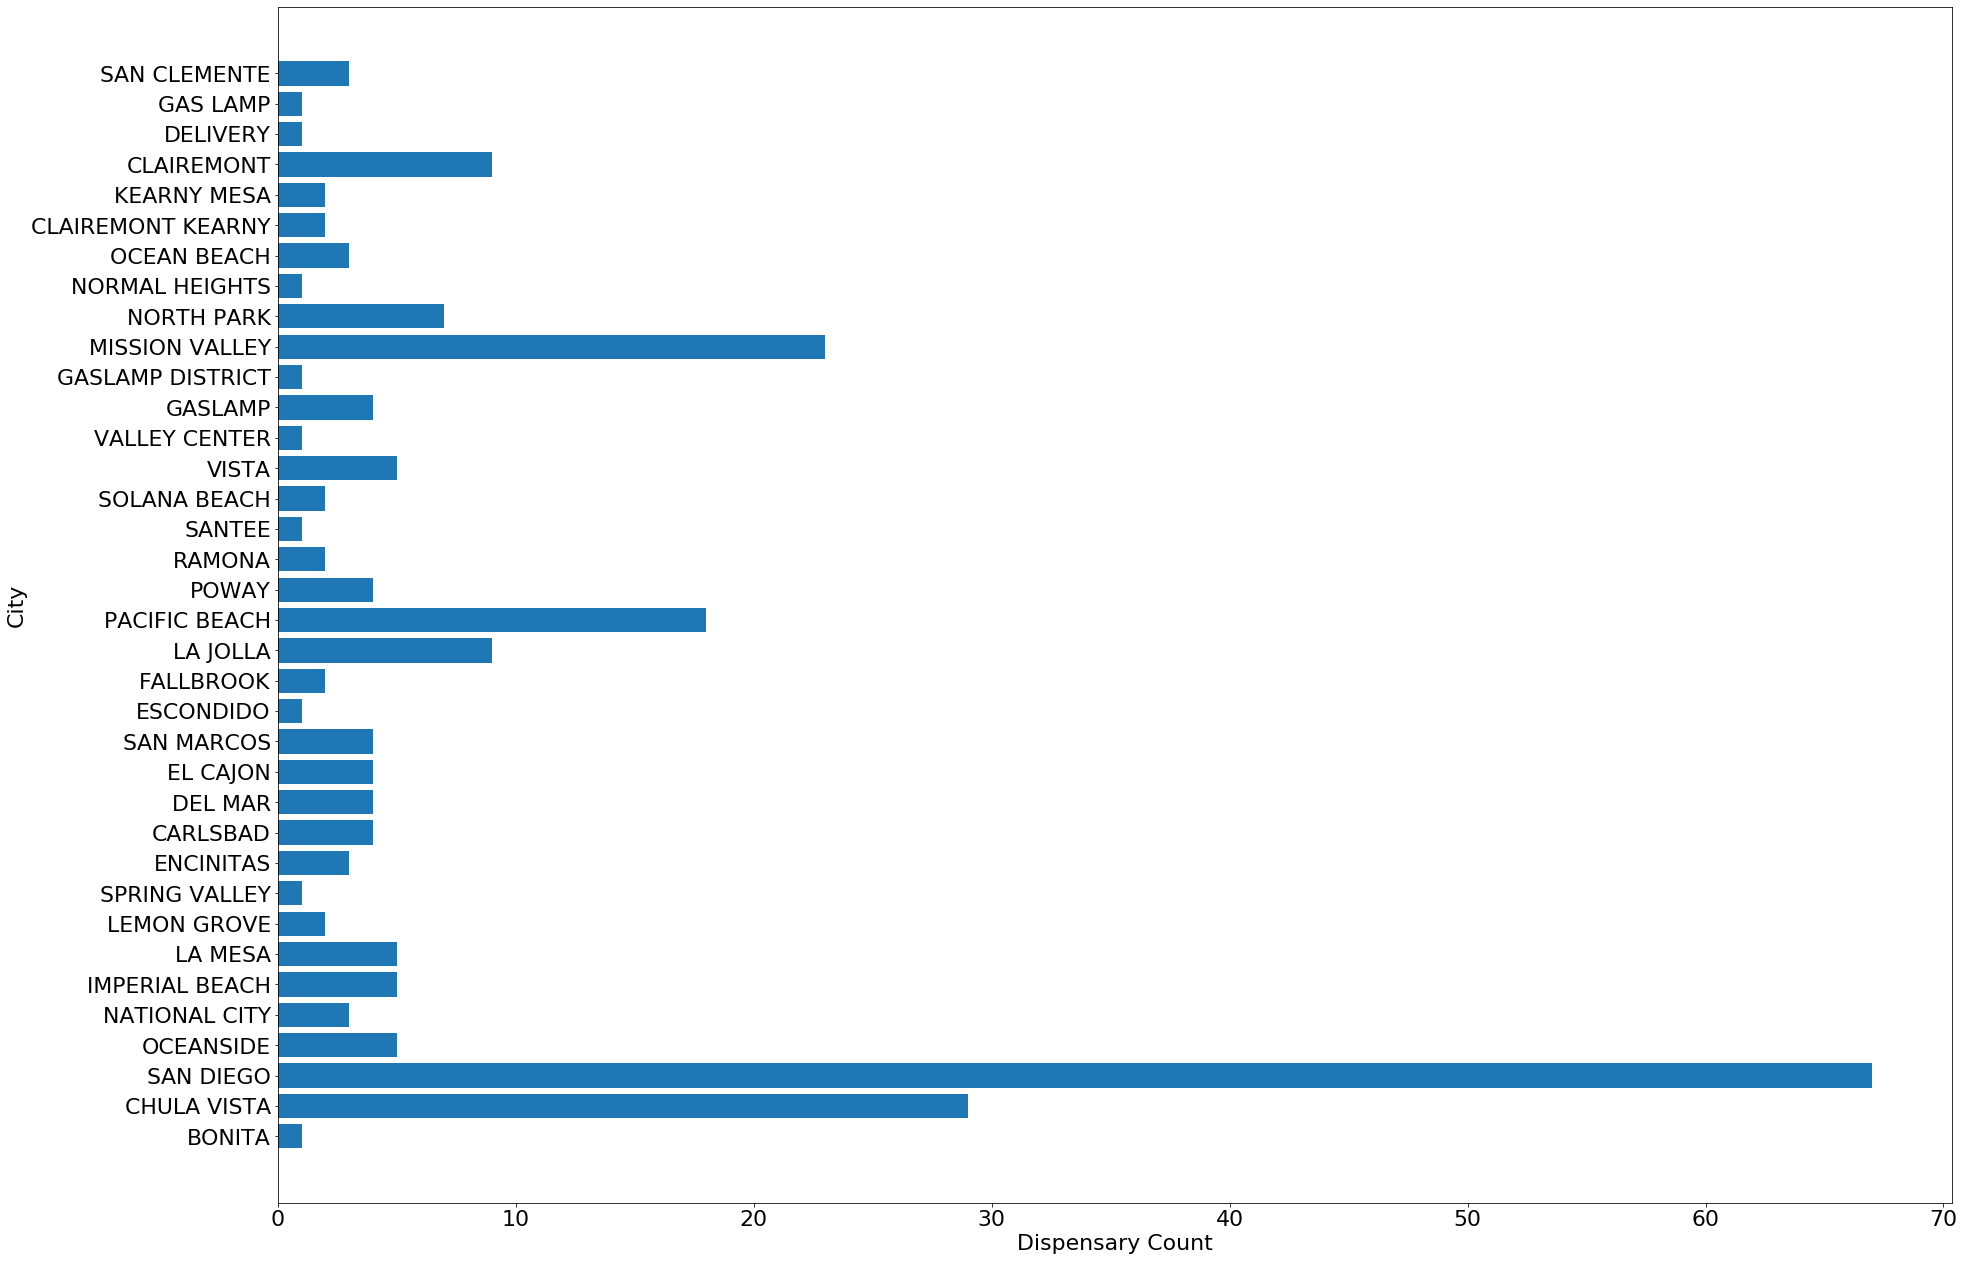

In [150]:
figure(num=None, figsize=(30, 22), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})
#plt.bar(disp_counts.keys(), disp_counts.values(), width = 1, color='g')
y_pos = np.arange(len(disp_counts.keys()))
plt.barh(y_pos , disp_counts.values()   , align='center' )
plt.yticks(y_pos, disp_counts.keys())
plt.xlabel('Dispensary Count')
plt.ylabel('City')
plt.show()

Right off the back we can see that some areas are more populated with dispensaries than others (ex: San Diego, Chula Vista, Mission Valley). Our task is to take a look and see if this follows some sort of pattern.
Lets extract the median income for all the cities for who we have a dispensary count for. 

In [184]:
cities_income = {}
for index, row in df_disp.iterrows():
    if row.city.upper() not in cities_income:
        cities_income[row.city.upper()] = []
        cities_income[row.city.upper()].append(row.median_income)
    else:
        cities_income[row.city.upper()].append(row.median_income)
cities_income['CHULA VISTA']

[76075,
 54288,
 54288,
 54288,
 54288,
 54288,
 54288,
 54288,
 54288,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 50186,
 86775,
 97977,
 98941,
 37744]

## Geospatial Analyses

In [15]:
geometry = [Point(xy) for xy in zip(df_disp['longitude'], df_disp['latitude'])]
geometry[:3] # to show the last 3 geometry points
crs = {'init': 'epsg:4326'} # crs = coordinate reference system



In [16]:
geo_df = gpd.GeoDataFrame(df_disp, crs = crs, geometry = geometry) # creates a geodataframe
geo_df.head()

,zip_code,median_income,name,city,type,latitude,longitude,ranking,rating,reviews_count,address,menu_items_count,geometry
0,91902,76075,Members Only,Bonita,delivery,32.656923,-117.021651,4.424276,5.000000,27,,73,POINT (-117.02165 32.65692)
1,91902,76075,Lavish Buds Delivery,Chula Vista,delivery,32.633279,-117.081274,3.434213,5.000000,6,,198,POINT (-117.08127 32.63328)
2,91910,54288,Happy Time Delivery,Chula Vista,delivery,32.646989,-117.073074,4.456167,4.692982,114,,829,POINT (-117.07307 32.64699)
3,91910,54288,True Meds Delivery Incorporated,Chula Vista,delivery,32.630931,-117.089424,4.760436,4.856484,347,,523,POINT (-117.08942 32.63093)
4,91910,54288,E Z Treez Delivery,Chula Vista,delivery,32.629779,-117.066428,3.656213,4.064516,62,,751,POINT (-117.06643 32.62978)


In [24]:
sd_map = gpd.read_file('MUNICIPAL_BOUNDARIES.shp')
fig,ax = plt.subplots(figsize = (10,10))
sd_map.plot(ax=ax)

NameError: name 'gpd' is not defined

In [ ]:
# Testing shit out

sd = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
# Testing shit out..

fig,ax = plt.subplots(figsize = (15,15))
sd_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['geometry']].plot(ax = ax, markersize = 20, color = 'red', marker = 'o')